In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import qiskit
from pyscf.ci import cisd
from src import classical_shadow
from qiskit_nature.second_q.circuit.library.ansatzes.utils import generate_fermionic_excitations 

def excitations_tuples_to_strings(p_exc,fermi_vac):
        p_exc_list =[]
        for exc_det_count in range(len(p_exc)):
            # print(p_exc[exc_det_count])
            # print(fermi_vac)
            fermi_vac_exc=fermi_vac
            for n_exc in range(len(p_exc[exc_det_count][0])):
                index1 = -1-p_exc[exc_det_count][0][n_exc]
                index2 = -1-p_exc[exc_det_count][1][n_exc]
                # print(fermi_vac_exc[index1])
                if index1==-1:
                    s = fermi_vac_exc[:index1] + "0"
                else:
                    s = fermi_vac_exc[:index1] + "0" + fermi_vac_exc[index1 + 1:]    

                if index2==-1:    
                    s2 = s[:index2] + "1"
                else:
                    s2 = s[:index2] + "1" + s[index2 + 1:]        
                # print(s)
                # print(s2)
                fermi_vac_exc = s2
            # print(fermi_vac_exc)   
            p_exc_list.append(fermi_vac_exc) 
        return p_exc_list

-0.439368861782849 0.03233692138812193


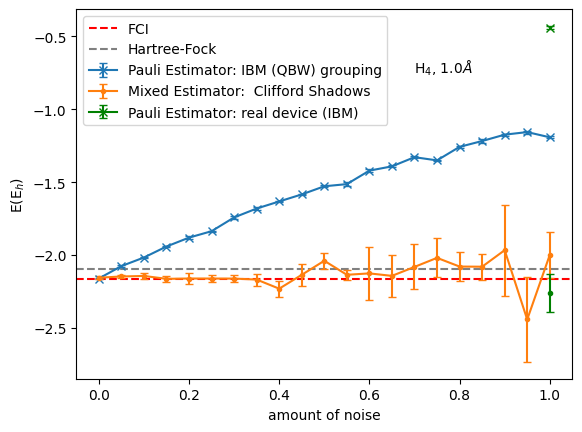

In [5]:
n_atom = 4
alpha = 0.0
nshots = 1000

number_estimates = 8 

alpha_list_exp=[]
mean_list_exp=[]
std_list_exp=[]

# for alpha in np.concatenate([np.arange(0.0,0.61,0.025),np.array([0.65])]):
for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_exp_val_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_exp_2 = pickle.load(f)
    # print(np.mean(result_list_exp_2),np.std(result_list_exp_2))
    alpha_list_exp.append(round(alpha,3))
    mean_list_exp.append(np.mean(result_list_exp_2[:number_estimates]))
    std_list_exp.append(np.std(result_list_exp_2[:number_estimates])/np.sqrt(number_estimates))



alpha_list_mixed=[]
mean_list_mixed=[]
std_list_mixed=[]

# for alpha in np.concatenate([np.arange(0.0,0.61,0.025),np.array([0.65])]):
for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_mixed_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_mixed_2 = pickle.load(f)
    # print(np.mean(result_list_mixed_2),np.std(result_list_mixed_2))
    alpha_list_mixed.append(round(alpha,3))
    mean_list_mixed.append(np.mean(result_list_mixed_2[number_estimates:]))
    std_list_mixed.append(np.std(result_list_mixed_2[number_estimates:])/np.sqrt(number_estimates))   

with open("noise_plot/energy_exp_vals.dat","r") as f:
    string = f.read()
exp_vals_real_4 = [float(x) for x in string.splitlines()]
print(np.mean(exp_vals_real_4),np.std(exp_vals_real_4))     

plt.axhline(-2.166387448632114,c="r",ls="--",label="FCI")  #-1.101150330232619
plt.axhline(-2.09854593699772  ,c="grey",ls="--",label="Hartree-Fock")  #-1.06610864931794
# plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp)
# plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed)
plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp,marker="x",capsize=3.,label="Pauli Estimator: IBM (QBW) grouping")
plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed,marker=".",capsize=3.,label="Mixed Estimator"+":  Clifford Shadows")
plt.errorbar([1.0],np.mean(exp_vals_real_4),np.std(exp_vals_real_4)/np.sqrt(8),marker="x",capsize=3.,c="green",label="Pauli Estimator: real device (IBM)")
# print(np.mean(e_proj_list),np.std(e_proj_list))###(-2.260005563063346-0.06020881674750556j) 0.3694230537806917
plt.errorbar([1.],[-2.260005563063346],[0.3694230537806917/np.sqrt(8)],marker=".",capsize=3.,c="green")
# plt.errorbar([1.0],np.mean(e_proj_list),np.std(e_proj_list),marker=".",capsize=3.,c="green")
plt.xlabel("amount of noise")
plt.ylabel(r"E(E$_h$)")
plt.legend()
plt.text(0.7,-0.75,r"H$_4$, 1.0$\AA$")
plt.savefig("../figures/figures_for_CS_paper/noise_plot_v2.png",bbox_inches="tight",dpi=500)

-0.439368861782849 0.03233692138812193


Text(0.7, -0.75, 'H$_4$, 1.0$\\AA$')

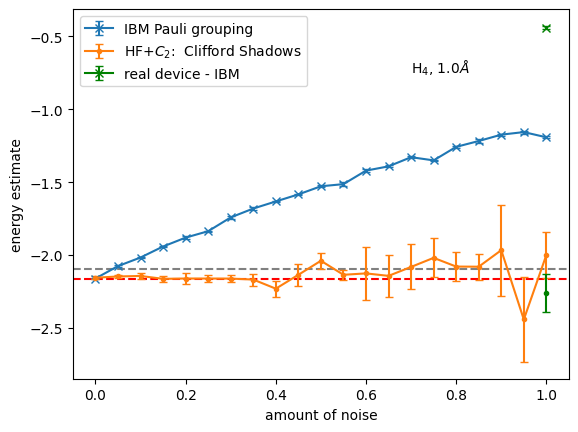

In [ ]:
n_atom = 4
alpha = 0.0
nshots = 1000

number_estimates = 8 

alpha_list_exp=[]
mean_list_exp=[]
std_list_exp=[]

# for alpha in np.concatenate([np.arange(0.0,0.61,0.025),np.array([0.65])]):
for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_exp_val_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_exp_2 = pickle.load(f)
    # print(np.mean(result_list_exp_2),np.std(result_list_exp_2))
    alpha_list_exp.append(round(alpha,3))
    mean_list_exp.append(np.mean(result_list_exp_2[:number_estimates]))
    std_list_exp.append(np.std(result_list_exp_2[:number_estimates])/np.sqrt(number_estimates))



alpha_list_mixed=[]
mean_list_mixed=[]
std_list_mixed=[]

# for alpha in np.concatenate([np.arange(0.0,0.61,0.025),np.array([0.65])]):
for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_mixed_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_mixed_2 = pickle.load(f)
    # print(np.mean(result_list_mixed_2),np.std(result_list_mixed_2))
    alpha_list_mixed.append(round(alpha,3))
    mean_list_mixed.append(np.mean(result_list_mixed_2[number_estimates:]))
    std_list_mixed.append(np.std(result_list_mixed_2[number_estimates:])/np.sqrt(number_estimates))   

with open("noise_plot/energy_exp_vals.dat","r") as f:
    string = f.read()
exp_vals_real_4 = [float(x) for x in string.splitlines()]
print(np.mean(exp_vals_real_4),np.std(exp_vals_real_4))     

plt.axhline(-2.166387448632114,c="r",ls="--")  #-1.101150330232619
plt.axhline(-2.09854593699772  ,c="grey",ls="--")  #-1.06610864931794
# plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp)
# plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed)
plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp,marker="x",capsize=3.,label="Pauli Estimator: IBM (QBW) grouping")
plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed,marker=".",capsize=3.,label="Mixed Estimator"+":  Clifford Shadows")
plt.errorbar([1.0],np.mean(exp_vals_real_4),np.std(exp_vals_real_4)/np.sqrt(8),marker="x",capsize=3.,c="green",label="Pauli Estimator: real device (IBM)")
# print(np.mean(e_proj_list),np.std(e_proj_list))###(-2.260005563063346-0.06020881674750556j) 0.3694230537806917
plt.errorbar([1.],[-2.260005563063346],[0.3694230537806917/np.sqrt(8)],marker=".",capsize=3.,c="green")
# plt.errorbar([1.0],np.mean(e_proj_list),np.std(e_proj_list),marker=".",capsize=3.,c="green")
plt.xlabel("amount of noise")
plt.ylabel(r"E(E$_h$)")
plt.legend()
plt.text(0.7,-0.75,r"H$_4$, 1.0$\AA$")
# plt.savefig("../figures/figures_for_CS_paper/noise_plot_v1.png",bbox_inches="tight",dpi=500)

(-0.03, 1.02)

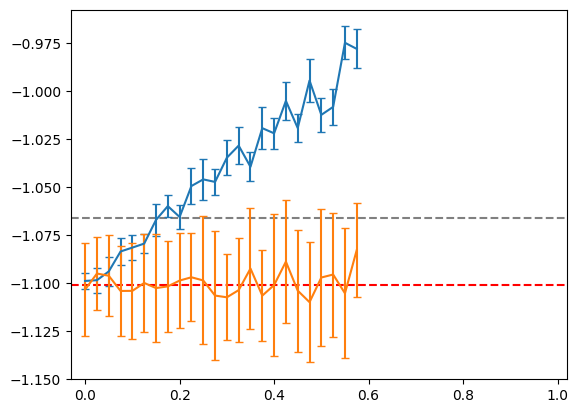

In [71]:
n_atom = 2
alpha = 0.0
nshots = 1000

alpha_list_exp=[]
mean_list_exp=[]
std_list_exp=[]

for alpha in np.arange(0.0,0.6,0.025):
    with open('noise_plot/energies_fr_exp_val_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_exp_2 = pickle.load(f)
    # print(np.mean(result_list_exp_2),np.std(result_list_exp_2))
    alpha_list_exp.append(round(alpha,3))
    mean_list_exp.append(np.mean(result_list_exp_2))
    std_list_exp.append(np.std(result_list_exp_2))


alpha_list_mixed=[]
mean_list_mixed=[]
std_list_mixed=[]

for alpha in np.arange(0.0,0.6,0.025):
    with open('noise_plot/energies_fr_mixed_for_noise_plot_'+str(nshots)+'_alpha_'+str(round(alpha,3))+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_mixed_2 = pickle.load(f)
    # print(np.mean(result_list_mixed_2),np.std(result_list_mixed_2))
    alpha_list_mixed.append(round(alpha,3))
    mean_list_mixed.append(np.mean(result_list_mixed_2))
    std_list_mixed.append(np.std(result_list_mixed_2))    

plt.axhline(-1.101150330232619,c="r",ls="--")  #
plt.axhline(-1.06610864931794 ,c="grey",ls="--")  #
plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp,capsize=3.)
plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed,capsize=3.)
plt.xlim(-0.03,1.02)

/home/connorlenihan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/connorlenihan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/connorlenihan/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/ma/core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


(-0.03, 1.02)

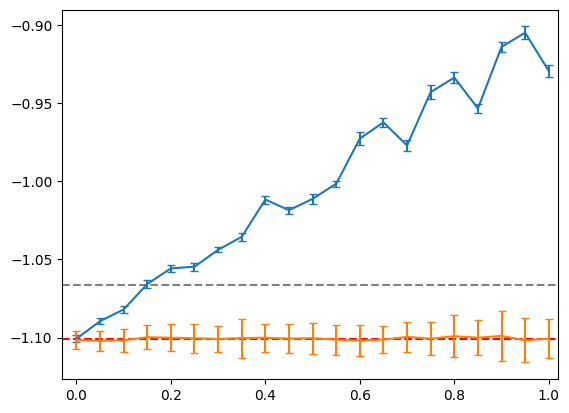

In [4]:
n_atom = 2
alpha = 0.0
nshots = 10000

alpha_list_exp=[]
mean_list_exp=[]
std_list_exp=[]

for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_exp_val_for_noise_plot_'+str(nshots)+'_alpha_'+str(alpha)+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_exp_2 = pickle.load(f)
    # print(np.mean(result_list_exp_2),np.std(result_list_exp_2))
    alpha_list_exp.append(alpha)
    mean_list_exp.append(np.mean(result_list_exp_2))
    std_list_exp.append(np.std(result_list_exp_2))


alpha_list_mixed=[]
mean_list_mixed=[]
std_list_mixed=[]

for alpha in np.arange(0.0,1.01,0.05):
    with open('noise_plot/energies_fr_mixed_for_noise_plot_'+str(nshots)+'_alpha_'+str(alpha)+'_Hydrogen_chain_'+str(n_atom)+'_atom_1.0_distance.pkl', 'rb') as f:
        result_list_mixed_2 = pickle.load(f)
    # print(np.mean(result_list_mixed_2),np.std(result_list_mixed_2))
    alpha_list_mixed.append(alpha)
    mean_list_mixed.append(np.mean(result_list_mixed_2))
    std_list_mixed.append(np.std(result_list_mixed_2))    

plt.axhline(-1.101150330232619,c="r",ls="--")  #
plt.axhline(-1.06610864931794 ,c="grey",ls="--")  #
plt.errorbar(alpha_list_exp,mean_list_exp,std_list_exp,capsize=3.)
plt.errorbar(alpha_list_mixed,mean_list_mixed,std_list_mixed,capsize=3.)
plt.xlim(-0.03,1.02)

In [7]:
with open('cliff_list_actual.pkl', 'rb') as f:
    clifford_list_2 = pickle.load(f)
clifford_list_2=clifford_list_2[:8000]    

with open("noise_plot/measurement_results_shadows.txt", "rb") as f:
    measurement_result = [str(x)[2:-1] for x in f.read().splitlines()]

measurement_result    

['11100111',
 '10000100',
 '00010101',
 '00011111',
 '11001001',
 '11111010',
 '11101010',
 '11101100',
 '01111111',
 '11100101',
 '10110010',
 '10100110',
 '11011000',
 '01110110',
 '00001010',
 '01101011',
 '11101111',
 '11101111',
 '00110101',
 '00011101',
 '01011000',
 '10111010',
 '00110001',
 '11101010',
 '10101010',
 '00111011',
 '11000010',
 '11011111',
 '10011110',
 '10011110',
 '01010100',
 '00110000',
 '00101001',
 '00011111',
 '01011010',
 '00010010',
 '00010011',
 '10010111',
 '01101101',
 '01111011',
 '01101110',
 '00011100',
 '00110111',
 '10111111',
 '11110101',
 '11111001',
 '10110011',
 '00010101',
 '11011110',
 '10111111',
 '10111110',
 '01101111',
 '11011101',
 '10011001',
 '11010000',
 '11111001',
 '01111100',
 '00001101',
 '10000011',
 '10111001',
 '00101000',
 '11001111',
 '00101001',
 '00011100',
 '11000011',
 '00101010',
 '10110000',
 '01101101',
 '11101000',
 '00100000',
 '01000101',
 '00111111',
 '11110101',
 '00010001',
 '00101111',
 '01010110',
 '00110101',

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
import ffsim
import numpy as np
from pyscf import cc
from pyscf import gto, scf, ao2mo, fci, ci
from pyscf import cc as cupclus

import scipy.optimize

import qiskit

from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# from qiskit_aer import AerSimulator

from qiskit_nature.second_q.operators import ElectronicIntegrals
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.hamiltonians import ElectronicEnergy

import pickle 

backend = FakeBrisbane()
# backend = AerSimulator()


nsite=4
d=1.0

my_atom=[("H 0. 0. %f" % xyz) for xyz in [d*x for x in list(range(nsite))]]

num_e = nsite




mol = gto.M(
    #atom = 'H 0 0 0; H 0 0 1.0; H 0 0 2.0; H 0 0 3.0',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 2.',#; H 0 0 4.0; H 0 0 6.0',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 1.55; H 0 0 3.1; H 0 0 4.65',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 2.',#; H 0 0 4.0; H 0 0 6.0',  # in Angstrom
    atom=my_atom,
    basis = 'sto-3g',
    symmetry = True,
    verbose = 3
)
nelec = mol.nelec
myhf = mol.RHF().run()
assert(myhf.converged)




cc = cupclus.CCSD(myhf)
cc.kernel()
assert cc.converged
print('CCSD total energy: {}'.format(cc.e_tot))
CCSD_energy = cc.e_tot





one_body = myhf.mo_coeff.T @ myhf.get_hcore() @ myhf.mo_coeff
eri = ao2mo.kernel(myhf._eri, (myhf.mo_coeff, myhf.mo_coeff,myhf.mo_coeff,myhf.mo_coeff), compact=False)
two_body = eri.reshape((myhf.mo_coeff.shape[-1],) * 4)

# Constructing the electronic hamiltonian in second quantised representation
integrals = ElectronicIntegrals.from_raw_integrals(h1_a=one_body, h1_b = one_body, h2_aa=two_body, h2_bb= two_body, h2_ba= two_body , auto_index_order=True) 

# Defining the many body electronic hamiltionian in second quantised representation

h_elec = ElectronicEnergy(integrals, constants = {'nuclear_repulsion_energy':mol.energy_nuc()}).second_q_op()       
mapper = JordanWignerMapper()
qubit_ham = mapper.map(h_elec) # this performs the JW transformation to qubit representation


mol_data = ffsim.MolecularData.from_scf(myhf)
norb = mol_data.norb
nelec = mol_data.nelec
nocc = nelec[0]
nvir=norb-nocc

fermi_vac='00110011'

converged SCF energy = -2.09854593699772


<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


E(CCSD) = -2.166379521639531  E_corr = -0.06783358464181327
CCSD total energy: -2.1663795216395307


In [9]:
print(measurement_result)
e_proj_list=[]
for n in range(8):
    measurement_result_nshots=measurement_result[n*nshots:(n+1)*nshots]
    cliffords_for_Us = [qiskit.quantum_info.Clifford.from_dict(rand_cliff) for rand_cliff in clifford_list_2[:nshots]]
    shadow = classical_shadow.Classical_shadow("Clifford",8,measurement_result_nshots,cliffords_for_Us)

    t1addr, t1sign = cisd.tn_addrs_signs(norb, nocc, 1)

    op_list=[]
    index_a=0#"0"*SV_basis_0.num_qubits#int(list(SV_basis_0.to_dict().keys())[0],2)
    ###index for HF state
    index_b=int(fermi_vac,2)
    op_list.append([1.,index_b,index_a])
    result,error = shadow.evaluate_operator_overlap_stabilizer_perp(op_list,samples_per_estimator=int(nshots//3),num_estimators = 3)
    c0_cs=result[0]


    ab_exc = generate_fermionic_excitations(num_excitations=2,max_spin_excitation=1, num_spatial_orbitals=norb, num_particles=nelec, alpha_spin=True, beta_spin=True, generalized=False, preserve_spin=True)
    ab_exc_strings = excitations_tuples_to_strings(ab_exc,fermi_vac)
    ### construct the labels for operators of the form |index_a><index_b| + |index_b><index_a| (for the real part) + imaginary part
    ab_int_norm_results=[]
    print("ab_exc_strings: ",ab_exc_strings)
    op_list=[]
    for ab in ab_exc_strings:
        index_a=0#"0"*SV_basis_0.num_qubits#int(list(SV_basis_0.to_dict().keys())[0],2)
        index_b=int(ab,2)
        # print(index_b)
        op_list.append([1.,index_b,index_a])
    result,error = shadow.evaluate_operator_overlap_stabilizer_perp(op_list,samples_per_estimator=int(nshots//3),num_estimators = 3)
    c2_cs_ab = np.einsum("i,j,ij->ij", t1sign, t1sign, np.reshape(result,(len(t1addr),len(t1addr))))
    c2_cs_ab = np.reshape(c2_cs_ab,(nocc, nvir, nocc, nvir)).transpose(0, 2, 1, 3)

    c2_cs_rs = c2_cs_ab/c0_cs
    g_ovvo = two_body[:nocc,nocc:,nocc:,:nocc]
    e_singles=0.
    e_doubles = 2 * np.einsum("ijab,iabj->", c2_cs_rs, g_ovvo) - np.einsum("ijab,ibaj->", c2_cs_rs, g_ovvo)
    e_proj = myhf.e_tot + e_singles + e_doubles
    print(e_proj)
    e_proj_list.append(e_proj)

['11100111', '10000100', '00010101', '00011111', '11001001', '11111010', '11101010', '11101100', '01111111', '11100101', '10110010', '10100110', '11011000', '01110110', '00001010', '01101011', '11101111', '11101111', '00110101', '00011101', '01011000', '10111010', '00110001', '11101010', '10101010', '00111011', '11000010', '11011111', '10011110', '10011110', '01010100', '00110000', '00101001', '00011111', '01011010', '00010010', '00010011', '10010111', '01101101', '01111011', '01101110', '00011100', '00110111', '10111111', '11110101', '11111001', '10110011', '00010101', '11011110', '10111111', '10111110', '01101111', '11011101', '10011001', '11010000', '11111001', '01111100', '00001101', '10000011', '10111001', '00101000', '11001111', '00101001', '00011100', '11000011', '00101010', '10110000', '01101101', '11101000', '00100000', '01000101', '00111111', '11110101', '00010001', '00101111', '01010110', '00110101', '00011111', '11000000', '10011010', '01000101', '11010010', '01110111', '11